## Comparing and Evaluating Clustering Algorithms

One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms. After talking about the algorithms behind k-means, agglomerative clustering, and DBSCAN, we will now compare them on some real-world datasets.

### Evaluating Clustering with Ground Truth

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the *adjusted rand index (ARI)* and *normalized mutual information (NMI)*, which both provide a quantitative measure with an optimum of 1 and a value of 0 for unrelated clusterings (though the ARI can become negative).

Here, we compare the k-means, agglomerative clustering, and DBSCAN algorithms using ARI. We also include what it looks like when we randomly assign points to two clusters for comparison:

In [5]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_moons

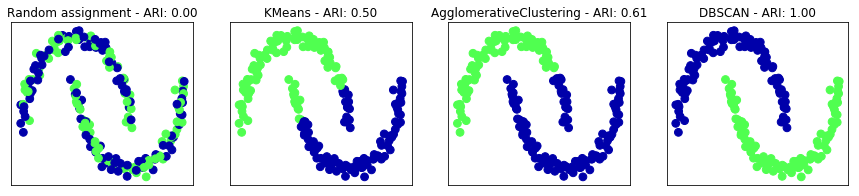

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

The adjusted rand index provides intuitive results, with a random cluster assignment having a score of 0 and DBSCAN (which recovers the desired clustering perfectly) having a score of 1.

A common mistake when evaluating clustering in this way is to use *accuracy_score* instead of *adjusted_rand_score*, *normalized_mutual_info_score*, or some other clustering metric. The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth. However, the cluster labels themselves are meaningless—the only thing that matters is which points are in the same cluster:

In [8]:
from sklearn.metrics import accuracy_score

# These two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# Accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# Adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
